In [1]:
pip install scipy pytorch-pretrained-biggan datasets[vision] torch

Defaulting to user installation because normal site-packages is not writeable
  Using cached scipy-1.11.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached datasets-2.14.6-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-1.26.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached tqdm-4.66.1-py3-none-any.whl.metadata (57 kB)
  Using cached pyarrow-13.0.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Using cached dill-0.3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached pandas-2.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached xxhash-3.4.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.15-py310-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached aiohttp-3.8.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metad

In [3]:
pip install git+https://github.com/lukemelas/pytorch-pretrained-gans

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/lukemelas/pytorch-pretrained-gans to /tmp/pip-req-build-awto5c96
  Running command git clone --filter=blob:none --quiet https://github.com/lukemelas/pytorch-pretrained-gans /tmp/pip-req-build-awto5c96
  Resolved https://github.com/lukemelas/pytorch-pretrained-gans to commit 2982fdab4e683165e45bc2f4a64c2942a7a3a1b7
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-pretrained-gans: filename=pytorch_pretrained_gans-0.0.1-py3-none-any.whl size=183876 sha256=51642d87abd593ae271661d3f46f34926d0732e64fd65b592ad522ef8b5b644e
  Stored in directory: /tmp/pip-ephem-wheel-cache-dnebryz8/wheels/1d/8a/47/13f79126bd2899ff579333c8a7a907c35d1175f95174cec8a5
Successfully built pytorch-pretrained-gans
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
from pytorch_pretrained_biggan import BigGAN

In [5]:
pip install torchvision

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 12.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [34]:
import torch 
from pytorch_pretrained_gans import make_gan
import torchvision

# this samples from a random latent space 

# BigBiGAN (unconditional)
G = make_gan(gan_type='bigbigan')  # -> nn.Module
z = G.sample_latent(batch_size=1)  # -> torch.Size([1, 120])
x = G(z=z)  # -> torch.Size([1, 3, 128, 128])
assert z.shape == torch.Size([1, 120])
assert x.shape == torch.Size([1, 3, 128, 128])

In [46]:
G.compile)

TypeError: compile() got an unexpected keyword argument 'loss'

In [45]:
G

GeneratorWrapper(
  (big_gan): Generator(
    (activation): ReLU(inplace=True)
    (shared): Embedding(1000, 128)
    (linear): SNLinear(in_features=20, out_features=24576, bias=True)
    (blocks): ModuleList(
      (0): ModuleList(
        (0): GBlock(
          (activation): ReLU(inplace=True)
          (conv1): SNConv2d(1536, 1536, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv2): SNConv2d(1536, 1536, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (conv_sc): SNConv2d(1536, 1536, kernel_size=(1, 1), stride=(1, 1))
          (bn1): ccbn(
            out: 1536, in: 148, cross_replica=False
            (gain): SNLinear(in_features=148, out_features=1536, bias=False)
            (bias): SNLinear(in_features=148, out_features=1536, bias=False)
          )
          (bn2): ccbn(
            out: 1536, in: 148, cross_replica=False
            (gain): SNLinear(in_features=148, out_features=1536, bias=False)
            (bias): SNLinear(in_features=148, out_f

In [17]:
model = BigGAN.from_pretrained('biggan-deep-256')
model.eval()

100%|██████████| 715/715 [00:00<00:00, 559084.15B/s]


BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0-2): 3 x GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_siz

In [23]:
model.training

False

In [3]:
import datasets
ds = datasets.load_from_disk('../datasets/test_train_new')

In [4]:
features = ds['eva_clip']

In [6]:
!pip install tensorflow

# custom models
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Flatten, Reshape, Input, InputLayer, Conv2DTranspose, Activation
from tensorflow.keras.models import Sequential, Model

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl (19 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached libclang-16.0.6-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached protobuf-4.24.4-cp37-abi3-manylinux2014_x86_64.whl.metadata (540 bytes)
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
 

2023-10-26 13:00:57.464826: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 13:00:57.508020: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 13:00:57.508041: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 13:00:57.508071: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 13:00:57.516122: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-26 13:00:57.517252: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [7]:
inp_size = len(features[0])

In [30]:
# trying a new 'autoencoder' 
import tensorflow as tf
from tensorflow.keras import layers

def make_generator_model(inp_shape):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape = inp_shape,))
    model.add(layers.Dense(100))
    model.add(layers.Dense(7*7*256, use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

In [62]:
model = make_generator_model(100)

In [ ]:
model.summary()

In [16]:
import numpy as np 
import torch 
array = np.asarray(features[0])

In [21]:
tensor = torch.from_numpy(array).unsqueeze(0)

In [22]:
tensor.shape

torch.Size([1, 1408])

In [57]:
test = np.asarray(features[0])[0:100]
test = np.expand_dims(test, axis = 0)

In [58]:
test.shape

(1, 100)

In [59]:
tensor = tf.convert_to_tensor(test)

In [60]:
type(tensor)

tensorflow.python.framework.ops.EagerTensor

In [53]:
tensor.shape

TensorShape([100])

In [64]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.8.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
  Using cached contourpy-1.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.43.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (152 kB)
  Using cached kiwisolver-1.4.5-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (6.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.8 MB/s eta 0:00:00:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 5.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.3 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.1 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


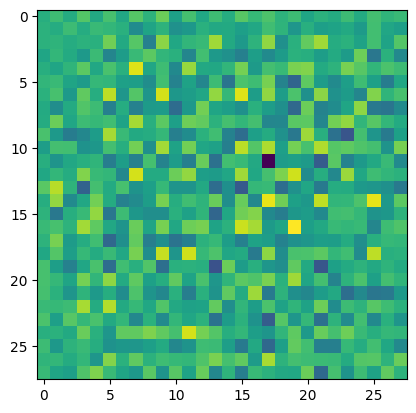

In [68]:
import matplotlib.pyplot as plt 
generated_image = model(test, training=False)

plt.imshow(generated_image[0, :, :, 0])

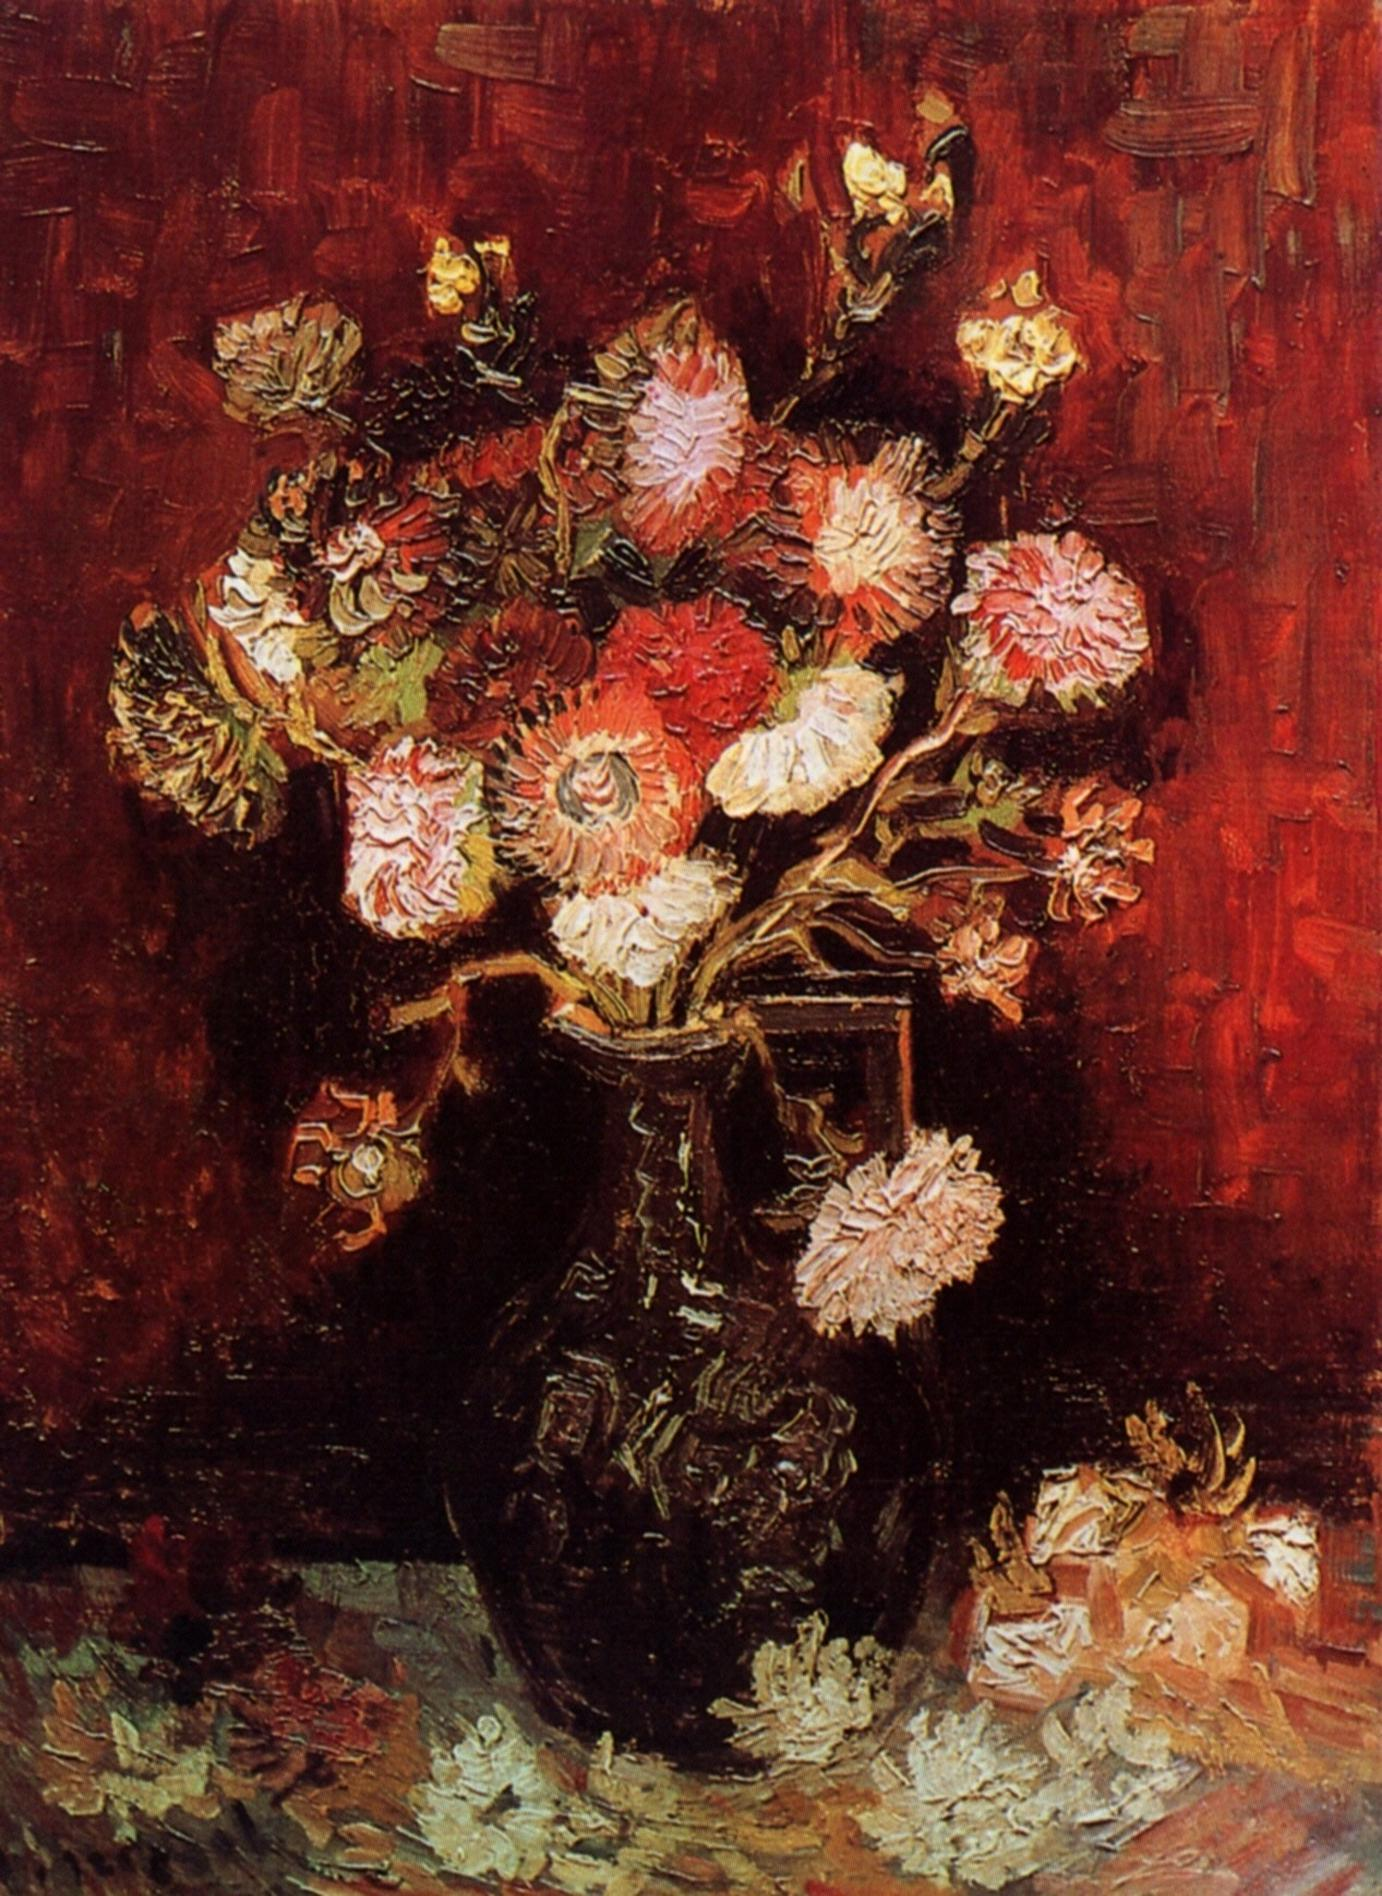

In [67]:
ds[0]['image']

In [32]:
model.compile(loss='BinaryCrossentropy', optimizer='adam')
model.fit(features, features, epochs=20)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/binary_crossentropy/mul/BroadcastGradientArgs defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/ucloud/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/ucloud/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/ucloud/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/ucloud/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_11532/1834967341.py", line 2, in <module>

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 543, in minimize

  File "/home/ucloud/.local/lib/python3.10/site-packages/keras/src/optimizers/optimizer.py", line 276, in compute_gradients

Incompatible shapes: [8,1408] vs. [8,28,28,1]
	 [[{{node gradient_tape/binary_crossentropy/mul/BroadcastGradientArgs}}]] [Op:__inference_train_function_4155]

In [ ]:
def pretrained_autoencoder(inp_shape, latent_shape):
    #n_layers = 4
    input_img = tf.keras.layers.Input(shape=(inp_shape,), name='input')

    enc1 = tf.keras.layers.Dense(300, activation = 'relu', name='encoder1')(input_img)
    #enc2 = tf.keras.layers.Dense(200, activation = 'relu', name='encoder2')(enc1)
    
    embedding = tf.keras.layers.Dense(latent_shape, activation = 'relu')(enc1)
    
    #dec1 = tf.keras.layers.Dense(200, activation = 'relu', name='decoder1')(embedding)
    dec2 = tf.keras.layers.Dense(300, activation = 'relu', name='decoder2')(embedding)

    decoded = tf.keras.layers.Dense(inp_shape, activation = 'relu', name='decoder3')(dec2)

    autoencoder, encoder = tf.keras.models.Model(inputs=input_img, outputs=decoded, name='AE'), tf.keras.models.Model(inputs=embedding, outputs=decoded, name='decoder')

    return autoencoder, encoder

In [ ]:
autoencoder, encoder = pretrained_autoencoder(512, 150)
autoencoder.summary()

autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.fit(features_train, features_train, epochs=30)

In [ ]:
prediction = autoencoder.predict(features_test)